## Health Insurance Analysis in U.S. (2010 to 2016)

Health insurance coverage data compiled from the US Department of Health and Human Services and US Census Bureau.

*Source:* https://www.kaggle.com/hhs/health-insurance


In [226]:
import numpy as np
import pandas as pd

# from sklearn.linear_model import LogisticRegression, Lasso, Ridge
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
# from sklearn.dummy import DummyClassifier
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
# from sklearn.cross_validation import train_test_split, cross_val_score
# from sklearn.grid_search import GridSearchCV
# from sklearn import metrics
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

health_insurance = pd.read_csv("../metis_IDS_project/states.csv")

In [310]:
health_insurance.rename(columns={
    "Uninsured Rate (2010)":"Uninsured_Rate_2010",                            
    "Uninsured Rate (2015)":"Uninsured_Rate_2015",                            
    "Uninsured Rate Change (2010-2015)":"Uninsured_Rate_Change_2010_2015",
    "Health Insurance Coverage Change (2010-2015)":"Coverage_Change_2010_2015",     
    "Employer Health Insurance Coverage (2015)":"Employer_HI_Coverage_2015",        
    "Marketplace Health Insurance Coverage (2016)":"Marketplace_Coverage_2016",
    "Marketplace Tax Credits (2016)":"Marketplace_Tax_Credits_2016",
    "Average Monthly Tax Credit (2016)":"Avg_Monthly_Tax_Credit_2016",
    "Stateb Medicaid Expansion (2016)":"State_MedicAID_Expansion_2016",
    "Medicaid Enrollment (2013)":"MedicAID_Enrollment_2013",
    "Medicaid Enrollment (2016)":"MedicAID_Enrollment_2016",
    "Medicaid Enrollment Change (2013-2016)":"MedicAID_Enrollment_Change_2013_2016",
    "Medicare Enrollment (2016)":"MediCARE_Enrollment_2016"       
    }, inplace=True)


In [313]:
# Changing column data types to float
health_insurance["Uninsured_Rate_2010"] = health_insurance["Uninsured_Rate_2010"].astype(str).astype(float)
health_insurance["Uninsured_Rate_2015"] = health_insurance["Uninsured_Rate_2015"].astype(str).astype(float)
health_insurance["Uninsured_Rate_Change_2010_2015"] = health_insurance["Uninsured_Rate_Change_2010_2015"].astype(str).astype(float)
health_insurance["Avg_Monthly_Tax_Credit_2016"] = health_insurance["Avg_Monthly_Tax_Credit_2016"].astype(str).astype(float)

health_insurance.dtypes

State                                    object
Uninsured_Rate_2010                     float64
Uninsured_Rate_2015                     float64
Uninsured_Rate_Change_2010_2015         float64
Coverage_Change_2010_2015                 int64
Employer_HI_Coverage_2015                 int64
Marketplace_Coverage_2016                 int64
Marketplace_Tax_Credits_2016              int64
Avg_Monthly_Tax_Credit_2016             float64
State_MedicAID_Expansion_2016            object
MedicAID_Enrollment_2013                float64
MedicAID_Enrollment_2016                  int64
MedicAID_Enrollment_Change_2013_2016    float64
MediCARE_Enrollment_2016                  int64
dtype: object

In [314]:
health_insurance.head()

,State,Uninsured_Rate_2010,Uninsured_Rate_2015,Uninsured_Rate_Change_2010_2015,Coverage_Change_2010_2015,Employer_HI_Coverage_2015,Marketplace_Coverage_2016,Marketplace_Tax_Credits_2016,Avg_Monthly_Tax_Credit_2016,State_MedicAID_Expansion_2016,MedicAID_Enrollment_2013,MedicAID_Enrollment_2016,MedicAID_Enrollment_Change_2013_2016,MediCARE_Enrollment_2016
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,True,7755381.0,11843081,4087700.0,5829777


In [305]:
health_insurance.tail(1)

,State,Uninsured_Rate_2010,Uninsured_Rate_2015,Uninsured_Rate_Change_2010_2015,Coverage_Change_2010_2015,Employer_HI_Coverage_2015,Marketplace_Coverage_2016,Marketplace_Tax_Credits_2016,Avg_Monthly_Tax_Credit_2016,State_MedicAID_Expansion_2016,MedicAID_Enrollment_2013,MedicAID_Enrollment_2016,MedicAID_Enrollment_Change_2013_2016,MediCARE_Enrollment_2016
51,United States,15.5,9.4,6.1,19304000,172292000,11081330,9389609,291.0,NaN,56392477.0,73532931,16106157.0,57149984


In [316]:
#Dropping the United States row to avoid skewing the data. 
health_insurance.drop(health_insurance.index[51])

# Correlation matrix
health_insurance.corr()

,Uninsured_Rate_2010,Uninsured_Rate_2015,Uninsured_Rate_Change_2010_2015,Coverage_Change_2010_2015,Employer_HI_Coverage_2015,Marketplace_Coverage_2016,Marketplace_Tax_Credits_2016,Avg_Monthly_Tax_Credit_2016,MedicAID_Enrollment_2013,MedicAID_Enrollment_2016,MedicAID_Enrollment_Change_2013_2016,MediCARE_Enrollment_2016
Uninsured_Rate_2010,1.000000,0.869074,-0.512217,0.127835,0.081566,0.127179,0.133772,0.259979,0.078675,0.088080,0.086789,0.084742
Uninsured_Rate_2015,0.869074,1.000000,-0.160628,0.072594,0.050499,0.098219,0.104914,0.387787,0.047176,0.044161,0.017247,0.053159
Uninsured_Rate_Change_2010_2015,-0.512217,-0.160628,1.000000,0.507685,0.562773,0.542041,0.538093,0.050172,0.576815,0.541092,0.517548,0.561724
Coverage_Change_2010_2015,0.127835,0.072594,0.507685,1.000000,0.994852,0.994007,0.992927,-0.020190,0.995612,0.997142,0.993211,0.994144
Employer_HI_Coverage_2015,0.081566,0.050499,0.562773,0.994852,1.000000,0.993882,0.991851,-0.029105,0.998722,0.998084,0.985844,0.999484
Marketplace_Coverage_2016,0.127179,0.098219,0.542041,0.994007,0.993882,1.000000,0.999825,-0.008075,0.991694,0.991108,0.979194,0.995248
Marketplace_Tax_Credits_2016,0.133772,0.104914,0.538093,0.992927,0.991851,0.999825,1.000000,-0.003210,0.989580,0.989097,0.977569,0.993561
Avg_Monthly_Tax_Credit_2016,0.259979,0.387787,0.050172,-0.020190,-0.029105,-0.008075,-0.003210,1.000000,-0.027559,-0.030081,-0.013936,-0.025097
MedicAID_Enrollment_2013,0.078675,0.047176,0.576815,0.995612,0.998722,0.991694,0.989580,-0.027559,1.000000,0.999405,0.987719,0.998103
MedicAID_Enrollment_2016,0.088080,0.044161,0.541092,0.997142,0.998084,0.991108,0.989097,-0.030081,0.999405,1.000000,0.992505,0.997334


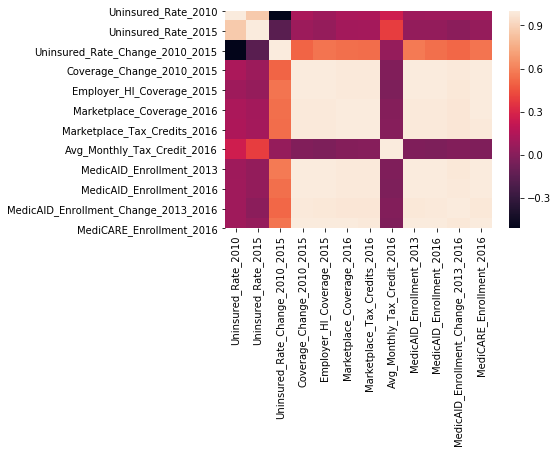

In [317]:
# Heatmap of coverage correlations
sns.heatmap(health_insurance.corr()) 

In [318]:
# Correlations between uninsured rates and employer health care coverage

print("Correlation between \n uninsured rate in 2010 and \n employer health care coverage in 2015:\n\n", health_insurance.Uninsured_Rate_2010.corr(health_insurance.Employer_HI_Coverage_2015, method="spearman"))
print("\nCorrelation between \n uninsured rate in 2015 and \n employer health care coverage in 2015:\n\n", health_insurance.Uninsured_Rate_2015.corr(health_insurance.Employer_HI_Coverage_2015, method="spearman") )


Correlation between 
 uninsured rate in 2010 and 
 employer health care coverage in 2015:

 0.15164581945668879

Correlation between 
 uninsured rate in 2015 and 
 employer health care coverage in 2015:

 0.05503725520561715


In [309]:
# Missing data? Five data points missing. 

health_insurance.isnull().sum()

State                                   0
Uninsured_Rate_2010                     0
Uninsured_Rate_2015                     0
Uninsured_Rate_Change_2010_2015         0
Coverage_Change_2010_2015               0
Employer_HI_Coverage_2015               0
Marketplace_Coverage_2016               0
Marketplace_Tax_Credits_2016            0
Avg_Monthly_Tax_Credit_2016             0
State_MedicAID_Expansion_2016           1
MedicAID_Enrollment_2013                2
MedicAID_Enrollment_2016                0
MedicAID_Enrollment_Change_2013_2016    2
MediCARE_Enrollment_2016                0
dtype: int64